## Universidad Autonoma de Aguascalientes
## Departamento: Ciencias de la Computación
## Carrera: Ingeníeria en Computación Inteligente
### Curso: Metaheuristicas I
### Maestro: Dr. Francisco Javier Luna Rosas
### Alumnos: 
### Dante Alejandro Alegria Romero
### Diego Alberto Aranda Gonzalez
### Andrea Margarita Balandran Felix
### Diego Emilia Moreno Sanchez
### Semestre: Agosto_Diciembre del 2024"


## Práctica No. 3: Optimización por Enjambre de Partículas (PSO)

#### PSO es un algoritmo de optimización inspirado en el comportamiento social de grupos de organismos, como bandadas de aves o bancos de peces. En esta práctica, implementamos PSO para simular la planificación de carga de 100,000 críticas de cine. Evaluaremos el rendimiento del sistema comparando el tiempo de ejecución secuencial frente al tiempo de ejecución en paralelo, utilizando 8 procesadores homogéneos. Además, presentaremos una tabla y un gráfico que ilustran la eficiencia de carga balanceada entre los procesadores.

### PASO 1: LIBRERIAS

In [1]:
import numpy as np
import pyswarms as ps
import json
import matplotlib.pyplot as plt

### Paso 2: Cargar los datos del JSON
 cargamos los datos desde un archivo JSON llamado reviews.json. Extraemos los tiempos de procesamiento de cada tarea y los almacenamos en un arreglo de numpy, lo que facilita su manipulación y cálculo.

In [2]:
with open('reviews.json') as file:
    tasks = json.load(file)

# Extraer los tiempos de procesamiento de las tareas
processing_times = np.array([task['time'] for task in tasks])

### Paso 3: Inicializar parámetros
Definimos el número de procesadores disponibles (en este caso, 8) y calculamos el total de tareas a partir del tamaño del arreglo processing_times.

In [3]:
num_processors = 8
numero_task = len(processing_times)

### Paso 4: Definir la función de fitness
La función fitness evalúa una asignación de tareas a procesadores. Primero, aseguramos que las tareas estén asignadas a procesadores válidos. Luego, calculamos la carga de cada procesador sumando los tiempos de procesamiento de las tareas asignadas. Finalmente, devolvemos la carga máxima de cualquier procesador, que será minimizada por el PSO.

In [4]:
def fitness(task_assignment):
    task_assignment = np.array(task_assignment).astype(int)
    processor_loads = np.zeros(num_processors)
    if np.any(task_assignment < 0) or np.any(task_assignment >= num_processors):
        return np.inf
    for i, processor in enumerate(task_assignment):
        processor_loads[processor] += processing_times[i]
    return np.max(processor_loads)

### Paso 5: Establecer límites del PSO
Establecemos los límites para la asignación de tareas. Cada tarea puede ser asignada a cualquier procesador del 0 al número de procesadores menos uno. Esto se representa mediante arreglos de límites inferiores y superiores.

In [5]:
lower_bound = np.zeros(numero_task)
upper_bound = np.ones(numero_task) * (num_processors - 1)

### Paso 6: Ejecutar el algoritmo PSO
nicializamos el optimizador PSO con un número de partículas (10) y las dimensiones correspondientes al número de tareas. 

In [6]:
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=numero_task, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9})
best_assignment, best_fitness = optimizer.optimize(fitness, iters=50)

2024-09-22 19:37:23,979 - pyswarms.single.global_best - INFO - Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████|50/50, best_cost=0.0436
2024-09-22 19:37:26,899 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.043581485748291016, best pos: [0.89751391 0.99913228 0.5889707  ... 0.32023473 0.47124213 0.34437603]


### Paso 7: Mostrar el resultado
 Imprimimos la mejor asignación de tareas obtenida por el PSO y el tiempo de procesamiento máximo que enfrenta el procesador más cargado, lo que nos da una medida de la eficiencia de la distribución de carga.

In [7]:
print('Mejor asignación de tareas:', best_assignment)
print('Tiempo de procesamiento máximo en un procesador:', best_fitness)

print(len(best_fitness))

"""
particula  = [0, 3, 6, 5, 1, ...]
tarea 1 procesador 0
tarea 2 procesador 3
...
"""

Mejor asignación de tareas: 0.043581485748291016
Tiempo de procesamiento máximo en un procesador: [0.89751391 0.99913228 0.5889707  ... 0.32023473 0.47124213 0.34437603]
100000


### Paso 8: Graficar la asignación de tareas


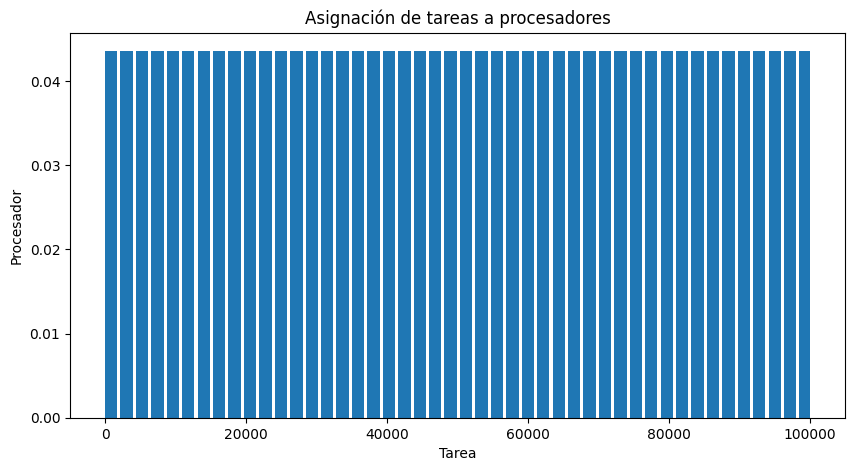

In [8]:
# Graficar la asignación de tareas
plt.figure(figsize=(10, 5))
plt.bar(np.arange(numero_task), best_assignment)
plt.xlabel('Tarea')
plt.ylabel('Procesador')
plt.title('Asignación de tareas a procesadores')
plt.show()